# Для крупного интернет-магазина необходимо приоритизировать подготовиленный список гипотез для увеличения выручки, а также проанализировать результаты проведенного А/Б теста.

# Оглавление

1. [Часть 1. Приоритизация гипотез.](#приоритизация)  
2. [Часть 2. Анализ А/Б теста](#анализ)  
    2.1 [Знакомство с полученными данными](#знакомство)  
    2.2 [Анализ теста](#анализ_теста)    
3. [Вывод](#вывод)

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 400)
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Часть 1. Приоритизация гипотез. <a name="приоритизация"></a>

In [2]:
hypo = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# pd.set_option('max_colwidth', 400) --> сделать полное отображение

У нас есть таблица с 9 гипотезами, которым дана оценка по параметрам reach, impact, confidence и efforts

Применим фреймворки ICE и RICE и посмотрим на результаты

In [5]:
hypo['ICE'] = hypo.Impact * hypo.Confidence / hypo.Efforts

In [6]:
hypo[['Hypothesis', 'ICE']].sort_values('ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


По результатам фреймворка ICE приоритетнее оказалась гипотеза №9

In [7]:
hypo['RICE'] = hypo.Reach * hypo.Impact * hypo.Confidence / hypo.Efforts


In [8]:
hypo[['Hypothesis', 'RICE']].sort_values('RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


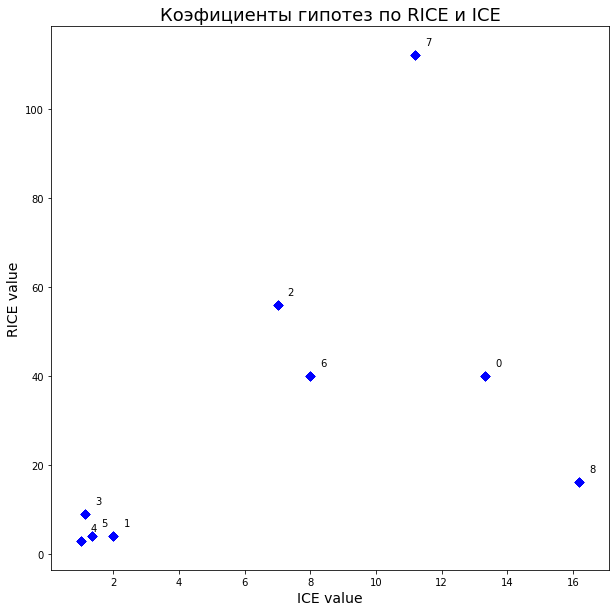

In [9]:
x = hypo['ICE'].values
y = hypo['RICE'].values
types = hypo.reset_index()['index'].values

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

ax.set_xlabel('ICE value', fontsize=14)
ax.set_ylabel('RICE value', fontsize=14)
ax.set_title('Коэфициенты гипотез по RICE и ICE', fontsize=18)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='D', color='blue')

После применения RICE приоритетнее оказалась гипотеза №8, которая ранее была на третьем месте по приоритету. 

Изменения в приоритете произошли из-за того, что добавился параметр охвата, 8-ая гипотеза имеет самую большую оценку по этому параметру, при средней оценке затрат, поэтому при применении фреймворка RICE она оказывается наиболее приоритетной

# Часть 2. Анализ А/Б теста <a name="анализ"></a>

## Знакомство с полученными данными <a name="знакомство"></a>

In [10]:
orders = pd.read_csv('/datasets/orders.csv')

In [11]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


В таблице Orders содержатся данные о заказах, айди пользователей, совершивших заказ, дате заказа, выручке и группе, в которую попал пользователь. Заменим названия столбцов, чтобы в дальнейшем было удобнее к ним обращаться

In [13]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

заодно проверим, не получилось ли так, что один и тот же пользователь попал одновременно в обе группы

In [14]:
A_orders = orders[orders.group == 'A']

In [15]:
B_orders = orders[orders.group == 'B']

In [16]:
uniqueA = A_orders.visitor_id.unique()
len(uniqueA)

503

In [17]:
uniqueB = B_orders.visitor_id.unique()
len(uniqueB)

586

In [18]:
both_groups = []
for each in A_orders.visitor_id.unique():
    if each in B_orders.visitor_id.unique():
        both_groups.append(each)

        

In [19]:
len(both_groups)

58

58 пользователей оказались в обеих группах. Их необходимо удалить, потому что они не дают нам конкретной картинки по результатам теста, мы не можем с уверенностью сказать, что именно объект проверки повлиял на их решение

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null object
revenue           1197 non-null int64
group             1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [21]:
orders = orders[~orders.visitor_id.isin(both_groups)]

In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1016 non-null int64
visitor_id        1016 non-null int64
date              1016 non-null object
revenue           1016 non-null int64
group             1016 non-null object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB


Посмотрим на таблицу visitors

In [23]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Здесь содержатся данные о кол-ве посетителей по группам для каждой даты

Для дальнейшего анализа выделим отдельные датафреймы

в датафрейме datesGroups соберем уникальные пары значений дат и групп 

In [24]:
datesGroups = orders[['date','group']].drop_duplicates()



в датафрейме ordersAggregated соберем накопительные данные (по кол-ву заказов, пользователей, оформивших заказ и суммарной выручке) на каждую дату

In [25]:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [26]:
ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


в visitorsAggregated соберем накопительные данные по кол-ву посетителей

In [27]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

соединим полученные датафреймы

In [28]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [29]:
cumulativeData.head()

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Посчитаем конверсию, разделив кол-во заказов на кол-во посетителей

In [30]:
cumulativeData['conversion'] = cumulativeData['transaction_id']/cumulativeData['visitors']

отдельными датафреймами выделим группы А и В

In [31]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']


In [32]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

## Анализ теста <a name="анализ_теста"></a>

#### Построим график кумулятивной выручки по группам

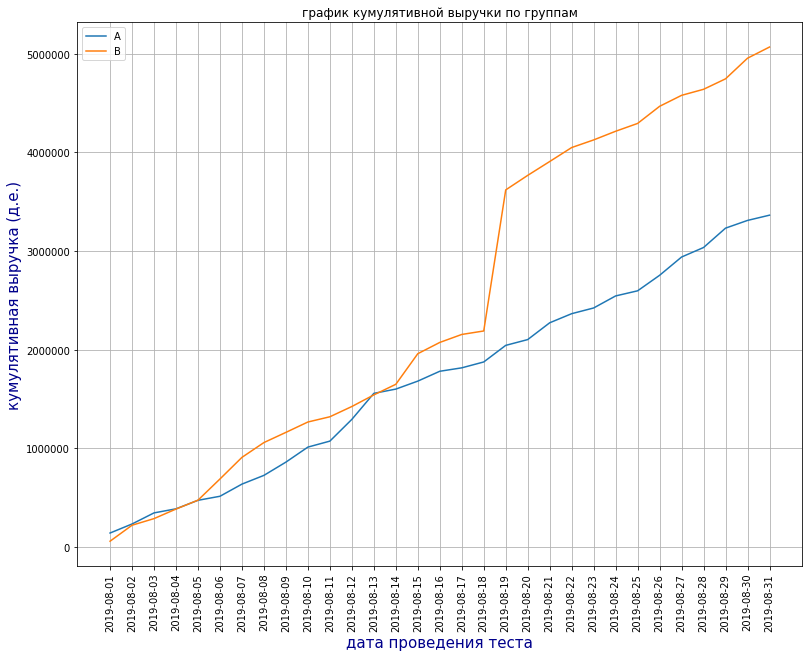

In [33]:
fig, ax = plt.subplots()
fig.set_figheight(10) 
fig.set_figwidth(13)  
ax.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label='A')
ax.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label='B')
ax.set_xlabel('дата проведения теста', fontsize = 15, color = 'darkblue')
ax.set_ylabel('кумулятивная выручка (д.е.)', fontsize = 15, color = 'darkblue')
ax.legend()
plt.xticks(rotation=90)
ax.grid(True)
ax.set_title('график кумулятивной выручки по группам')
plt.show()

В целом выручка в обоих группах показывает стабильный рост, до 18 августа были некоторые колебания, а вот после группа В показала резкий скачок, возможно, были какие-то выбросы в виде крупных заказов. По большей части тренд в обоих группах одинаковый, а показатель группы А немного выше на протяжении всего теста

#### Построим график кумулятивного среднего чека по группам.

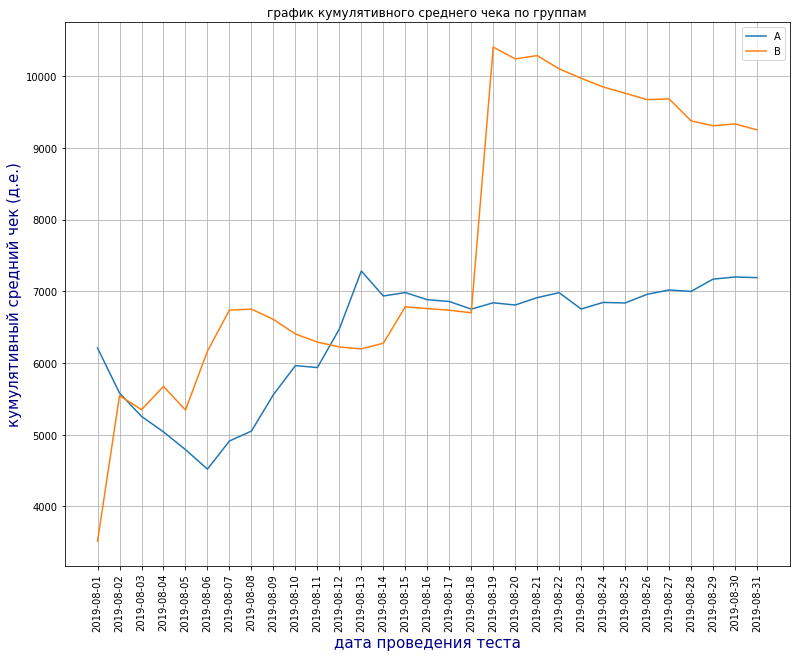

In [34]:
fig, ax = plt.subplots()
fig.set_figheight(10) 
fig.set_figwidth(13) 
ax.plot(cumulativeDataA['date'], cumulativeDataA['revenue']/cumulativeDataA['transaction_id'], label='A')
ax.plot(cumulativeDataB['date'], cumulativeDataB['revenue']/cumulativeDataB['transaction_id'], label='B')
ax.legend()
ax.set_xlabel('дата проведения теста', fontsize = 15, color = 'darkblue')
ax.set_ylabel('кумулятивный средний чек (д.е.)', fontsize = 15, color = 'darkblue')
plt.xticks(rotation=90)
ax.grid(True)
ax.set_title('график кумулятивного среднего чека по группам')
plt.show()

Средний чек по группе Б стабилизировался после 12 августа, а в группе А опять можно наблюдать скачок после 18го числа. Наверняка были выбросы по стоимости заказов

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

In [35]:
mergedCumulativeRevenue = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

['date','revenue', 'transaction_id']

In [36]:
mergedCumulativeRevenue.head()

,date,group_A,transaction_id_A,visitor_id_A,revenue_A,visitors_A,conversion_A,group_B,transaction_id_B,visitor_id_B,revenue_B,visitors_B,conversion_B
0,2019-08-01,A,23,19,142779,719,0.031989,B,17,17,59758,713,0.023843
1,2019-08-02,A,42,36,234381,1338,0.031390,B,40,39,221801,1294,0.030912
2,2019-08-03,A,66,60,346854,1845,0.035772,B,54,53,288850,1803,0.029950
3,2019-08-04,A,77,71,388030,2562,0.030055,B,68,66,385740,2573,0.026428
4,2019-08-05,A,99,92,474413,3318,0.029837,B,89,87,475648,3280,0.027134


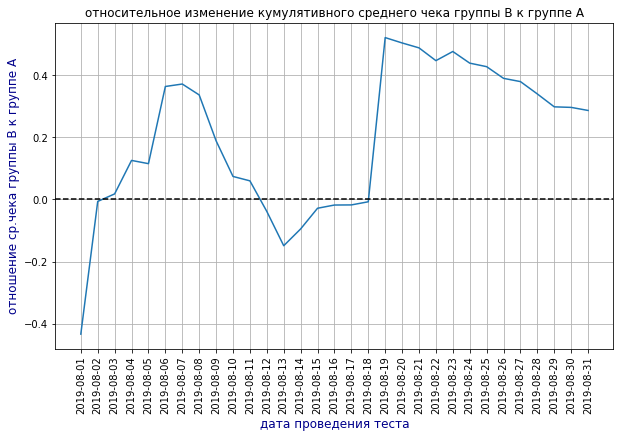

In [37]:
fig, ax = plt.subplots()
fig.set_figheight(6) 
fig.set_figwidth(10) 
ax.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenue_B']/mergedCumulativeRevenue['transaction_id_B'])/(mergedCumulativeRevenue['revenue_A']/mergedCumulativeRevenue['transaction_id_A'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
ax.set_xlabel('дата проведения теста', fontsize = 12, color = 'darkblue')
ax.set_ylabel('отношение ср.чека группы В к группе А', fontsize = 12, color = 'darkblue')
plt.xticks(rotation=90)
ax.grid(True)
ax.set_title('относительное изменение кумулятивного среднего чека группы B к группе A')
plt.show()

График сильно скачет на протяжении всего теста, после резкого скачка 18го числа преимущество группы В показывает нисходящий тренд

#### Построим график кумулятивной конверсии по группам

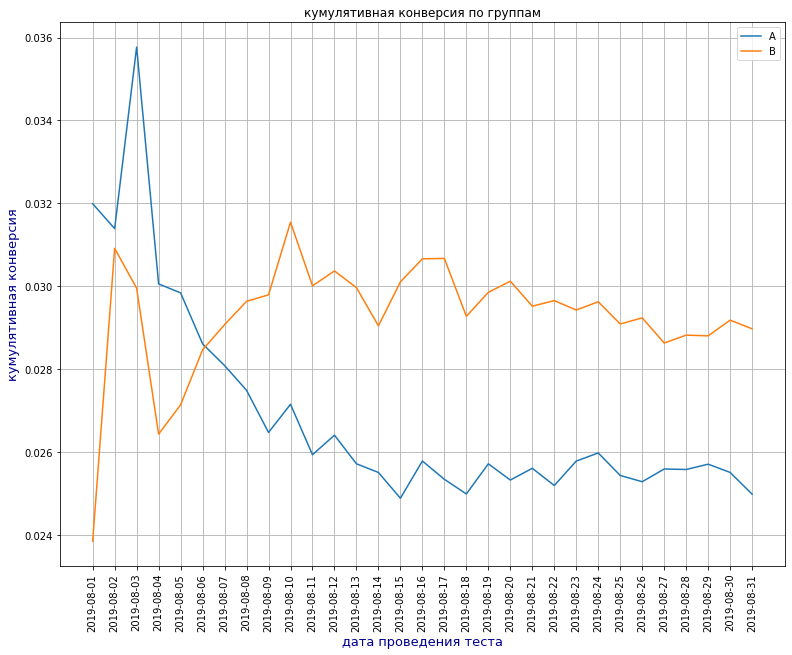

In [38]:
fig, ax = plt.subplots()
fig.set_figheight(10) 
fig.set_figwidth(13) 
ax.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
ax.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
ax.set_xlabel('дата проведения теста', fontsize = 13, color = 'darkblue')
ax.set_ylabel('кумулятивная конверсия', fontsize = 13, color = 'darkblue')
ax.legend()
plt.xticks(rotation=90)
ax.grid(True)
ax.set_title('кумулятивная конверсия по группам')
plt.show()

А вот графики конверсии относительно стабилизировались, и группа В показывает результат лучше примерно на 0.04% 

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A

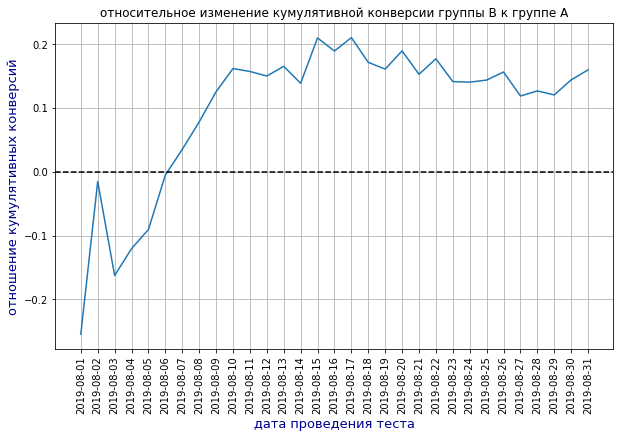

In [39]:
fig, ax = plt.subplots()
fig.set_figheight(6) 
fig.set_figwidth(10) 
ax.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['conversion_B']/mergedCumulativeRevenue['conversion_A']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=90)
ax.set_xlabel('дата проведения теста', fontsize = 13, color = 'darkblue')
ax.set_ylabel('отношение кумулятивных конверсий', fontsize = 13, color = 'darkblue')
ax.grid(True)
ax.set_title('относительное изменение кумулятивной конверсии группы B к группе A')
plt.show()

Буквально через неделю после начала теста группа В стала показывать стабильно лучший результат по сравнению с группой А - приблизительно на 15% 

Для более точных результатов необходимо посмотреть на возможные выбросы

#### Построим точечный график количества заказов по пользователям

In [40]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [41]:
transactions = orders.groupby(['group','visitor_id']).agg({'transaction_id' : 'count'}).reset_index()

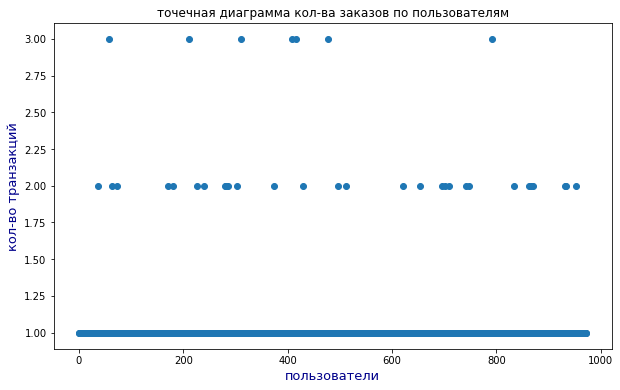

In [42]:
x_values = pd.Series(range(0,len(transactions['visitor_id'])))
fig, ax = plt.subplots()
fig.set_figheight(6) 
fig.set_figwidth(10) 
ax.scatter(x_values, transactions['transaction_id'])
ax.set_xlabel('пользователи', fontsize = 13, color = 'darkblue')
ax.set_ylabel('кол-во транзакций', fontsize = 13, color = 'darkblue')
ax.set_title('точечная диаграмма кол-ва заказов по пользователям')
plt.show()

Большинство делают по одному заказу, но есть определенная доля с 2 заказами и 3-мя

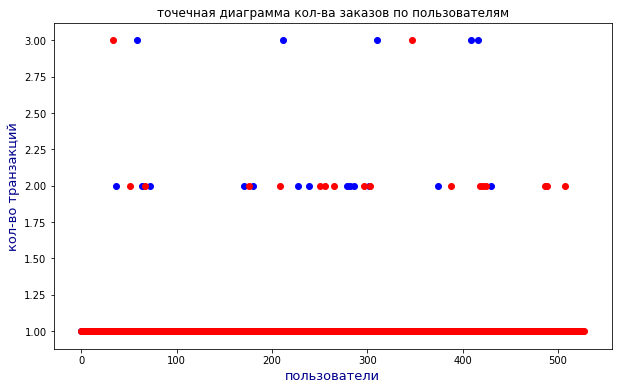

In [43]:
x_values = pd.Series(range(0,len(transactions[transactions.group == 'A']['visitor_id'])))
z_values = pd.Series(range(0,len(transactions[transactions.group == 'B']['visitor_id'])))
fig, ax = plt.subplots()
fig.set_figheight(6) 
fig.set_figwidth(10) 
ax.scatter(x_values, transactions[transactions.group == 'A']['transaction_id'], c = 'blue')
ax.scatter(z_values, transactions[transactions.group == 'B']['transaction_id'], c = 'red')
ax.set_xlabel('пользователи', fontsize = 13, color = 'darkblue')
ax.set_ylabel('кол-во транзакций', fontsize = 13, color = 'darkblue')
ax.set_title('точечная диаграмма кол-ва заказов по пользователям')
plt.show()

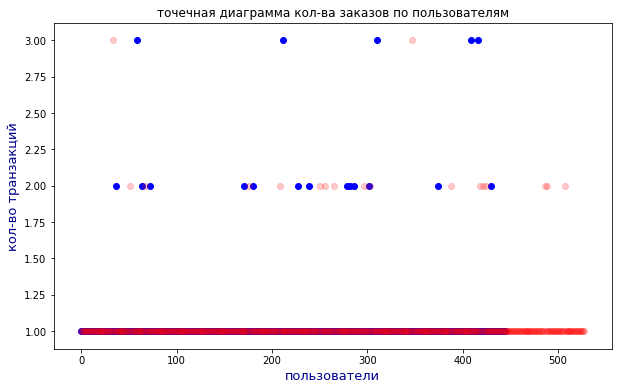

In [44]:
x_values = pd.Series(range(0,len(transactions[transactions.group == 'A']['visitor_id'])))
z_values = pd.Series(range(0,len(transactions[transactions.group == 'B']['visitor_id'])))
fig, ax = plt.subplots()
fig.set_figheight(6) 
fig.set_figwidth(10) 
ax.scatter(x_values, transactions[transactions.group == 'A']['transaction_id'], c = 'blue', alpha=1)
ax.scatter(z_values, transactions[transactions.group == 'B']['transaction_id'], c = 'red', alpha=0.2)
ax.set_xlabel('пользователи', fontsize = 13, color = 'darkblue')
ax.set_ylabel('кол-во транзакций', fontsize = 13, color = 'darkblue')
ax.set_title('точечная диаграмма кол-ва заказов по пользователям')
plt.show()

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [45]:
np.percentile(transactions['transaction_id'], [95, 99])

array([1., 2.])

Всего 5% пользователей делают больше 1 заказа, и лишь 1% - больше 2ух. Можно выделить пользователей с 2 и 3 заказами как аномальных

#### Теперь также посмотрим на распределение стоимостей заказов

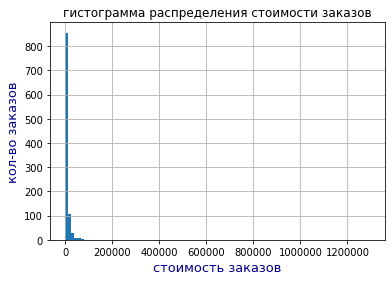

In [46]:
ax = orders.revenue.hist(bins = 100)
ax.set_xlabel('стоимость заказов', fontsize = 13, color = 'darkblue')
ax.set_ylabel('кол-во заказов', fontsize = 13, color = 'darkblue')
ax.set_title('гистограмма распределения стоимости заказов')
plt.show()

In [47]:
orders.revenue.max()

1294500

есть очень крупные аномальные заказы, но основная доля где-то до 100 тысяч. Посмотрим поближе

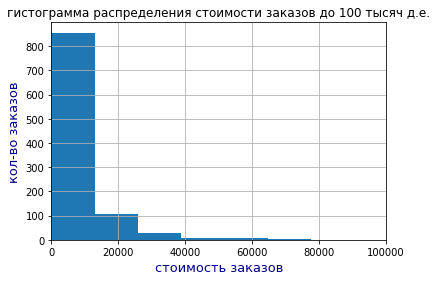

In [48]:
ax = orders.revenue.hist(bins = 100)
ax.set_xlabel('стоимость заказов', fontsize = 13, color = 'darkblue')
ax.set_ylabel('кол-во заказов', fontsize = 13, color = 'darkblue')
plt.xlim(0, 100000)
ax.set_title('гистограмма распределения стоимости заказов до 100 тысяч д.е.')
plt.show()

Основная доля заказов имеет стоимость до 15 тысяч д.е.

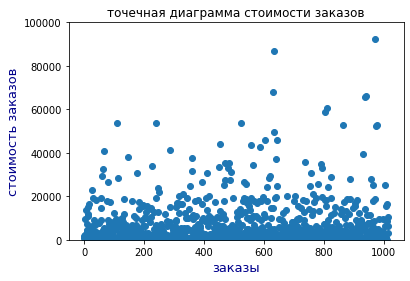

In [49]:
x_values = pd.Series(range(0,len(orders['transaction_id'])))
fig, ax = plt.subplots()
ax.scatter(x_values, orders['revenue']) 
ax.set_xlabel('заказы', fontsize = 13, color = 'darkblue')
ax.set_ylabel('стоимость заказов', fontsize = 13, color = 'darkblue')
plt.ylim(0, 100000)
ax.set_title('точечная диаграмма стоимости заказов')
plt.show()

#### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [50]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

5% заказов имеют стоимость выше 26785 д.е., стоит выделить такие заказы как аномальные.

#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [51]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'transactions']


In [52]:
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'transactions'] 

в этих датафреймах содержатся информация о кол-ве заказов на каждого пользователя из разных групп, хотя бы раз совершившего заказ

In [53]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Добавим к ним тех, кто посещал платформу, но заказы не совершал

In [54]:
sampleA = pd.concat([ordersByUsersA['transactions'],pd.Series(0, index=np.arange(visitors[visitors.group == 'A']['visitors'].sum() - len(ordersByUsersA['transactions'])), name='transactions')],axis=0)

In [55]:
sampleB = pd.concat([ordersByUsersB['transactions'],pd.Series(0, index=np.arange(visitors[visitors.group == 'B']['visitors'].sum() - len(ordersByUsersB['transactions'])), name='transactions')],axis=0) 

#### Теперь посчитаем саму статистическую значимость. 
#### Нулевая гипотеза: "по сырым данным статистически значимых различий в конверсии между группами нет"
#### Альтернативная гипотеза: "по сырым данным различия в конверсии между группами возможны"
#### Уровень статистической значимости определяем равным 0,05

In [56]:
raw_conversion = "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])
raw_conversion

'0.006'

Получили показатель меньше критического значения 0.05, значит нулевую гипотезу отвергаем, и различия в конверсии возможны

In [57]:
raw_conversion_diff = "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)
raw_conversion_diff

'0.160'

При этом относительный выигрыш группы В составляет 16%

#### Посмотрим на статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
#### Нулевая гипотеза: "по сырым данным статистически значимых различий в среднем чеке между группами нет"
#### Альтернативная гипотеза: "по сырым данным различия в среднем чеке между группами возможны"
#### Уровень статистической значимости определяем равным 0,05

In [58]:
raw_rev = "{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
raw_rev

'0.415'

Получили показатель, значительно превышающий критическое значение 0.05. Соответственно, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет

In [59]:
raw_rev_diff = "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
raw_rev_diff

'0.287'

Хотя, средний чек группы B значительно выше среднего чека группы A - на 28,7%

#### Теперь необходимо посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Выделим отдельно пользователей, совершивших более 1 заказа и сделавших заказ на сумму более 27000 д.е.

In [60]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactions'] > 1]['visitor_id'], ordersByUsersB[ordersByUsersB['transactions'] > 2]['visitor_id']], axis = 0)

In [61]:
usersWithExpensiveOrders = orders[orders['revenue'] > 27000]['visitor_id']


In [62]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [63]:
abnormalUsers

568      113298937
1099     148427295
928      204675465
33       249864742
684      358944393
           ...    
416     3967698036
940     4003628586
723     4009017467
430     4109358064
743     4133034833
Name: visitor_id, Length: 70, dtype: int64

Таких пользователей оказалось 70 человек

Отфильтруем наши датафреймы, убрав оттуда данных пользователей

In [64]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['transactions'],pd.Series(0, index=np.arange(visitors[visitors.group == 'A']['visitors'].sum() - len(ordersByUsersA['transactions'])),name='transactions')],axis=0)

 

In [65]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['transactions'],pd.Series(0, index=np.arange(visitors[visitors.group == 'B']['visitors'].sum() - len(ordersByUsersB['transactions'])),name='transactions')],axis=0)

#### И посчитаем показатели по очищенным данным. Сначала статистическую значимость различий в конверсии между группами
#### Нулевая гипотеза: "по очищенным данным статистически значимых различий в конверсии между группами нет"
#### Альтернативная гипотеза: "по очищенным данным различия в конверсии между группами возможны"
#### Уровень статистической значимости определяем равным 0,05

In [66]:
filtered_conversion = "{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
filtered_conversion

'0.002'

Показатель изменился не сильно, и нулевую гипотезу также отвергаем - различия в конверсии возможны

In [67]:
filtered_conversion_diff = "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)
filtered_conversion_diff

'0.251'

Относительный выигрыш группы В при этом повысился до 25,1%

#### Теперь посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
#### Нулевая гипотеза: "по очищенным данным статистически значимых различий в среднем чеке между группами нет"
#### Альтернативная гипотеза: "по очищенным данным различия в среднем чеке между группами возможны"
#### Уровень статистической значимости определяем равным 0,05

In [68]:
filtered_rev = "{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1])
filtered_rev

'0.402'

Разница также небольшая, значит по-прежнему причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет

In [69]:
filtered_rev_diff = "{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)
filtered_rev_diff

'-0.038'

Но теперь преимущество в группе А, на 3,8 %

In [70]:
abc = pd.DataFrame({'конверсия' : [raw_conversion, filtered_conversion], 'средний чек' : [raw_rev, filtered_rev], 'относительная конверсия' : [raw_conversion_diff, filtered_conversion_diff], 'относительный ср.чек' : [raw_rev_diff, filtered_rev_diff]}, index = ['сырые данные', 'очищенные данные'])

In [71]:
abc

,конверсия,средний чек,относительная конверсия,относительный ср.чек
сырые данные,0.006,0.415,0.160,0.287
очищенные данные,0.002,0.402,0.251,-0.038


# Вывод <a name="вывод"></a>

По результатам А/Б теста, проводимого с 01.08.2019 по 31.08.2019 был проведен анализ полученной конверсии и среднего чека по группам А и В и посчитана статистическая разница различий по этим показателям как по сырым данным, так и по очищенным. При очистке данных были отброшены пользователи, совершившие более 1 заказа, а также заказы свыше 27 тысяч д.е.
Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Относительная конверсия зафиксировалась на уровне +16% в пользу группы В (по сырым данным) и 25% по очищенным данным.
По сырым данным нет статистически значимого различия по среднему чеку между группами, также как и по очищенным данным.
По результатам теста, проведенного с 1 августа 2019 по 31 августа 2019, рекомендуется остановить тест и зафиксировать положительный результат по группе В. Версия нововведения, которой пользовались посетители интернет-магазина из данной группы, показала бОльший прирост конверсии, однако ее влияние на средний чек зафиксировать нельзя. 